<h1>Multi-armed Bandits</h1>

Preference:

Reinforemcent Learning: An Introduction.

# 0. Elements of Reinforcement Learning

+ Policy

+ Reward Signal

+ Value Function

+ Model

# 1. $k$-armed Bandits

The value of action $a$, which is the predicted expectation of rewards, is defined as, 

> $q_*(a) = \mathbb{E}[R_t|A_t = a]$

$A_t$ is the action selected on time step $t$, and $R_t$ is the corresponding reward.

In [18]:
# e-greedy
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1)

def normal_fn(mu, std):
    while True:
        yield np.random.normal(mu, std)

        
def exclude_sample(exclude, num=10):
    low = 0
    high = num - 1
    rand_n = np.random.randint(low, high)
    
    if rand_n < exclude:
        return rand_n
    else:
        return exclude + 1
        
        
def bandit_experience(reward_fns, n_step=2000, n_arm=10, epsilon=0.01):

    """
    Q-value
        Expected value of each action, 
        to be learned or counted as average of samples.
    """
    Q_reward = np.zeros(n_arm)
    Q_num = np.zeros(n_arm)

    total_reward = 0.
    avg_rewards = []

    for step in range(n_step):
        # Choose current action, based on the Q_reward
        action = np.argmax(Q_reward)

        ## e-greedy
        _ = np.random.random()

        if _ < epsilon:
            #action = exclude_sample(action, num=n_arm)
            action = np.random.randint(0, n_arm)

        # Get reward of the action, update the respectively Q_value
        reward = next(reward_fns[action])

        #action_avg_reward = Q_reward[action]
        #num = Q_num[action]
        #Q_reward[action] = (action_avg_reward * num + reward) / (num + 1)
        Q_num[action] += 1
        Q_reward[action] = Q_reward[action] + (reward - Q_reward[action]) / Q_num[action]
        
        # avg_reward of each step 
        total_reward += reward
        avg_reward = total_reward / (step+1)
        avg_rewards.append(avg_reward)
    return np.array(avg_rewards)        

In [31]:
# Run
n_run = 1000
n_step = 2000

rewards_1 = np.zeros(n_step)
rewards_2 = np.zeros(n_step)
rewards_3 = np.zeros(n_step)
rewards_4 = np.zeros(n_step)

for _ in range(n_run):
    rewards_1 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0)
    rewards_2 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.01)
    rewards_3 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.1)
    rewards_4 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.5)

rewards_1 /= n_step
rewards_2 /= n_step
rewards_3 /= n_step
rewards_4 /= n_step

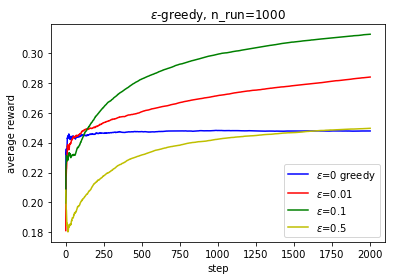

In [33]:
# Plot
x = np.linspace(1, 2000, 2000)

plt.plot(x, rewards_1, 'b-', label='$\epsilon$=0 greedy')
plt.plot(x, rewards_2, 'r-', label='$\epsilon$=0.01')
plt.plot(x, rewards_3, 'g-', label='$\epsilon$=0.1')
plt.plot(x, rewards_4, 'y-', label='$\epsilon$=0.5')
plt.legend(loc='best')
plt.xlabel('step')
plt.ylabel('average reward')
plt.title('$\epsilon$-greedy, n_run=%s' % n_run)
plt.show()

# 2. Upper-Confidence-Bound Action Selection

The $\epsilon$-greedy algorithm is try to balance between <b>Exploitation</b> and <b>Exploration</b>. 

The biggest diffence of multi-armed bandits algorithms compared to greedy algorithms is the chance to <b>Explore</b>. To improve the extent of exploration of $\epsilon$-greedy algorithm, the upper-confidence-bound action selection algorithm is proposed.

> $A_t = \arg\max_{a}\left[ Q_t(a) + c\sqrt{\frac{\ln t}{N_t(a)}} \right]$

The UCB algorithm will encourage to <b>explore</b> action that was chosen much few in the long run.

In [35]:
# Upper-Confidence-Bound
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1)

def normal_fn(mu, std):
    while True:
        yield np.random.normal(mu, std)

        
def exclude_sample(exclude, num=10):
    low = 0
    high = num - 1
    rand_n = np.random.randint(low, high)
    
    if rand_n < exclude:
        return rand_n
    else:
        return exclude + 1
        
        
def bandit_experience(reward_fns, 
                      n_step=2000, 
                      n_arm=10, 
                      epsilon=0.01,
                      c=2):

    """
    Q-value
        Expected value of each action, 
        to be learned or counted as average of samples.
    """
    Q_reward = np.zeros(n_arm)
    Q_num = np.zeros(n_arm)

    total_reward = 0.
    avg_rewards = []

    for step in range(n_step):
        # Choose current action, based on the Q_reward
        ## UCB, N_t(a) + 1 for smoothing
        #action = np.argmax(Q_reward)
        action = np.argmax(Q_reward + c * 
                           np.sqrt(np.log(step+1) / 
                                  Q_num+1))

        ## e-greedy
        _ = np.random.random()

        if _ < epsilon:
            #action = exclude_sample(action, num=n_arm)
            action = np.random.randint(0, n_arm)

        # Get reward of the action, update the respectively Q_value
        reward = next(reward_fns[action])

        #action_avg_reward = Q_reward[action]
        #num = Q_num[action]
        #Q_reward[action] = (action_avg_reward * num + reward) / (num + 1)
        Q_num[action] += 1
        Q_reward[action] = Q_reward[action] + (reward - Q_reward[action]) / Q_num[action]
        
        # avg_reward of each step 
        total_reward += reward
        avg_reward = total_reward / (step+1)
        avg_rewards.append(avg_reward)
    return np.array(avg_rewards)        

In [36]:
# Run
n_run = 1000
n_step = 2000

ucb_rewards_1 = np.zeros(n_step)
ucb_rewards_2 = np.zeros(n_step)
ucb_rewards_3 = np.zeros(n_step)
ucb_rewards_4 = np.zeros(n_step)

for _ in range(n_run):
    ucb_rewards_1 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.01, c=1)
    ucb_rewards_2 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.1, c=1)
    ucb_rewards_3 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.01, c=2)
    ucb_rewards_4 += bandit_experience(reward_fns, n_step, n_arm, epsilon=0.1, c=2)

ucb_rewards_1 /= n_step
ucb_rewards_2 /= n_step
ucb_rewards_3 /= n_step
ucb_rewards_4 /= n_step

/Users/flyingman/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/flyingman/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


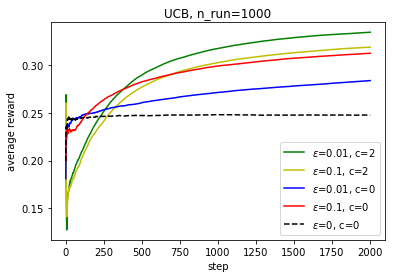

In [42]:
# Plot
x = np.linspace(1, 2000, 2000)


plt.plot(x, ucb_rewards_3, 'g-', label='$\epsilon$=0.01, c=2')
plt.plot(x, ucb_rewards_4, 'y-', label='$\epsilon$=0.1, c=2')

plt.plot(x, rewards_2, 'b-', label='$\epsilon$=0.01, c=0')
plt.plot(x, rewards_3, 'r-', label='$\epsilon$=0.1, c=0')
plt.plot(x, rewards_1, 'k--', label='$\epsilon$=0, c=0')

plt.legend(loc='best')
plt.xlabel('step')
plt.ylabel('average reward')
plt.title('UCB, n_run=%s' % n_run)
plt.show()